# Decision Tree Classification

<h3>--Vishvaa Chhatrara</h3>

### Step: 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step: 2: Import Dataset

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step: 3: Creating the Target variable

In [3]:
target = pd.read_csv("Iris.csv", usecols = ['Species'])

a = np.array([])

for i in range(0, 150):
    if target.Species[i] == 'Iris-setosa':
        a = np.append(a, [int(1)])
    elif target.Species[i] == 'Iris-versicolor':
        a = np.append(a, [int(2)])
    elif target.Species[i] == 'Iris-virginica':
        a = np.append(a, [int(0)])
        
target = a.astype(int)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Step: 4: Visualizing the Data

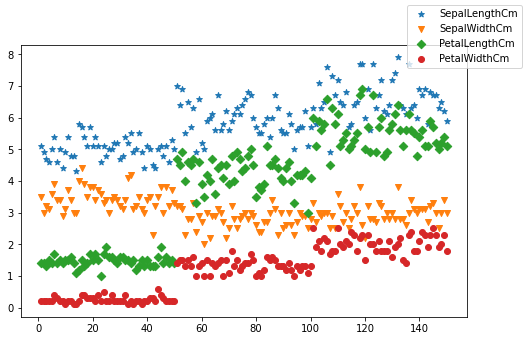

In [4]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x = iris.Id, y = iris.SepalLengthCm, marker = "*")
plt.scatter(x = iris.Id, y = iris.SepalWidthCm, marker = "v")
plt.scatter(x = iris.Id, y = iris.PetalLengthCm, marker = "D")
plt.scatter(x = iris.Id, y = iris.PetalWidthCm, marker = "o")


fig.legend(labels=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

### Step: 5: Understanding the concept

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

Types of Desicion Tree classification Algorithms

1. ID3
2. Gini Index
3. Chi-Square
4. Reduction in Variance

### Step: 6: Splitting into training and testing dataset

In [5]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.iloc[:, [1, 2, 3, 4]], iris.Species, train_size=0.75,test_size=0.25, random_state=101)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


### Step: 7: Creating a model and fitting the train data

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Step: 8: Representaion of Decision tree

In [7]:
from sklearn import tree

#### Step: 8.1: Text Representation

In [8]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: Iris-setosa
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



#### Step: 8.2: Tree Graph Representation

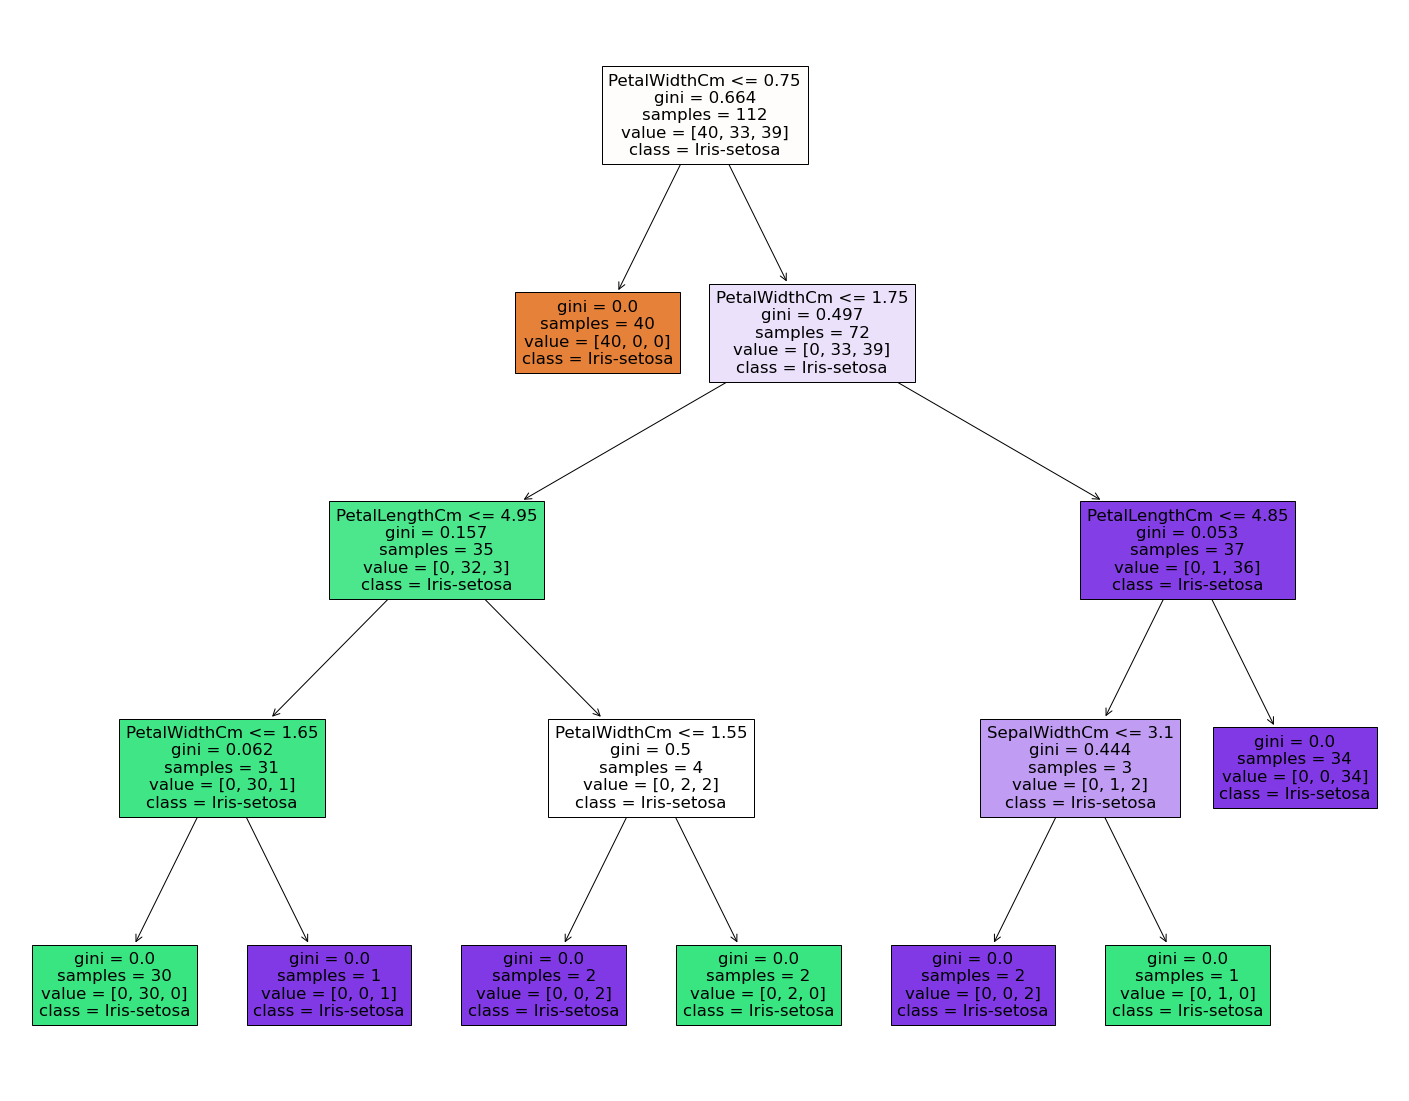

In [9]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                   class_names=iris['Species'],
                   filled=True)

### Step: 9: Predicting the model using test values

In [10]:
y_pred = dtree.predict(X_test, y_test.all())

### Step: 10: Calculating the accuracy of the model

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 
# accuracy_score(y_test, y_pred,normalize=False)

0.9736842105263158

<h1><center> Thank You </center></h1>